In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
org_data_list=[]
file_names=['2006-05-13.csv','2006-05-14.csv','2006-05-15.csv','2006-05-16.csv','2006-05-17.csv', '2006-05-18.csv','2006-05-19.csv','2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']

for f in file_names:
    data=pd.read_csv('data/raw_data/'+f)
    if f in ['2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']:
        q25,q75=np.quantile(data['SJS13'],[0.25,0.75])
        print(q25-1.5*(q75-q25),q75+1.5*(q75-q25))
        data['SJS13'][data['SJS13']<q25-1.5*(q75-q25)]=np.nan#3000
        data['SJS13'][data['SJS13']>q75+1.5*(q75-q25)]=np.nan#2700
    data=data.interpolate(method='linear')
    data=data.iloc[90:-90]
    print(data.shape)
    org_data_list.append(data)

(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
2774.862492801036 2860.8972732559014
(172620, 14)
2785.931150398128 2869.0900732652844
(172620, 14)
2732.015028449452 2869.1944270294844
(172620, 14)


In [3]:
data_list=[]
file_names=['2006-05-13.csv','2006-05-14.csv','2006-05-15.csv','2006-05-16.csv','2006-05-17.csv', '2006-05-18.csv','2006-05-19.csv','2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']

for f in file_names:
    data=pd.read_csv('data/raw_data/'+f)
    data = data.drop(['SJX08','SJX13'],axis=1)
    if f in ['2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']:
        q25,q75=np.quantile(data['SJS13'],[0.25,0.75])
        print(q25-1.5*(q75-q25),q75+1.5*(q75-q25))
        data['SJS13'][data['SJS13']<q25-1.5*(q75-q25)]=np.nan#3000
        data['SJS13'][data['SJS13']>q75+1.5*(q75-q25)]=np.nan#2700
    data=data.interpolate(method='linear')
    data=data.iloc[90:-90]
    print(data.shape)
    data_list.append(data)

(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
(172620, 12)
2774.862492801036 2860.8972732559014
(172620, 12)
2785.931150398128 2869.0900732652844
(172620, 12)
2732.015028449452 2869.1944270294844
(172620, 12)


In [4]:
pre_data_list=[]
file_names=['2006-05-13.csv','2006-05-14.csv','2006-05-15.csv','2006-05-16.csv','2006-05-17.csv', '2006-05-18.csv','2006-05-19.csv','2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']

for f in file_names:
    data=pd.read_csv('data/raw_data/'+f)
    data = data.drop(['SJS08', 'SJS13', 'SJX08','SJX13'],axis=1)
    print(data.shape)
    pre_data_list.append(data)

(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)
(172800, 10)


In [5]:
file_names=['2006-05-13','2006-05-14','2006-05-15','2006-05-16','2006-05-17', '2006-05-18','2006-05-19','2007-12-14','2009-05-05','2011-11-01']
org_cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14", "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]
cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14", "SJX09", "SJX10", "SJX11", "SJX12", "SJX14"]
pre_cable_title = ["SJS09", "SJS10", "SJS11", "SJS12", "SJS14", "SJX09", "SJX10", "SJX11", "SJX12", "SJX14"]

In [6]:
datas = org_data_list.copy()
for i, data in enumerate(datas):
    data = data.values
    data = np.transpose(data)
    datas[i] = data
org_cable_data = datas
org_cable_data = np.array(org_cable_data)
org_cable_data.shape

(10, 14, 172620)

In [7]:
datas = data_list.copy()
for i, data in enumerate(datas):
    data = data.values
    data = np.transpose(data)
    datas[i] = data
cable_data = datas
cable_data = np.array(cable_data)
cable_data.shape

(10, 12, 172620)

In [8]:
datas = pre_data_list.copy()
for i, data in enumerate(datas):
    data = data.values
    data = np.transpose(data)
    datas[i] = data
pre_cable_data = datas
pre_cable_data = np.array(pre_cable_data)
pre_cable_data.shape

(10, 10, 172800)

In [9]:
from scipy.signal import find_peaks
from scipy.ndimage import median_filter

In [10]:
def make_nan_array(length, index_list, values):
    data = np.empty(length)
    data[:] = np.nan
    np.put(data, index_list, values)
    idx = np.argwhere(~np.isnan(data))[0][0]
    data[0] = data[idx]
    return data

In [11]:
def preprocess(data):
    peaks, _ = find_peaks(data, height=(np.mean(data) - np.std(data), np.mean(data) + np.std(data)))
    peak_data = make_nan_array(len(data), peaks, data[peaks])
    peak = data[peaks]
    median_peak = median_filter(peak, 50)
    median_peak_data = make_nan_array(len(data), peaks, median_peak)
    
    inter = pd.Series(median_peak_data).interpolate()
    rolling = pd.Series(inter).rolling(1200, min_periods=1).mean()

    return rolling, data - rolling

In [12]:
org_cable_rolling = []
org_cable_diff_rolling = []
for i in range(org_cable_data.shape[0]):
    org_rolling_datas = []
    org_diff_rolling_datas = []
    for j in range(org_cable_data.shape[1]):
        org_rollings = []
        org_data_rollings = []
        for k in range(24):
            org_data = org_cable_data[i][j][k*7200:(k+1)*7200]
            org_rolling, org_data_rolling = preprocess(org_data)
            org_rollings.append(org_rolling)
            org_data_rollings.append(org_data_rolling)
        org_rolling = np.concatenate(org_rollings)
        org_data_rolling = np.concatenate(org_data_rollings)
        org_rolling_datas.append(org_rolling)
        org_diff_rolling_datas.append(org_data_rolling)
    org_rolling_datas = np.array(org_rolling_datas)
    org_diff_rolling_datas = np.array(org_diff_rolling_datas)
    org_cable_rolling.append(org_rolling_datas)
    org_cable_diff_rolling.append(org_diff_rolling_datas)
    print(org_rolling_datas.shape, org_diff_rolling_datas.shape)
org_cable_rolling = np.array(org_cable_rolling)
org_cable_diff_rolling = np.array(org_cable_diff_rolling)
org_cable_rolling.shape, org_cable_diff_rolling.shape

(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)
(14, 172620) (14, 172620)


((10, 14, 172620), (10, 14, 172620))

In [13]:
cable_rolling = []
cable_diff_rolling = []
for i in range(cable_data.shape[0]):
    rolling_datas = []
    diff_rolling_datas = []
    for j in range(cable_data.shape[1]):
        rollings = []
        data_rollings = []
        for k in range(24):
            data = cable_data[i][j][k*7200:(k+1)*7200]
            rolling, data_rolling = preprocess(data)
            rollings.append(rolling)
            data_rollings.append(data_rolling)
        rolling = np.concatenate(rollings)
        data_rolling = np.concatenate(data_rollings)
        rolling_datas.append(rolling)
        diff_rolling_datas.append(data_rolling)
    rolling_datas = np.array(rolling_datas)
    diff_rolling_datas = np.array(diff_rolling_datas)
    cable_rolling.append(rolling_datas)
    cable_diff_rolling.append(diff_rolling_datas)
    print(rolling_datas.shape, diff_rolling_datas.shape)
cable_rolling = np.array(cable_rolling)
cable_diff_rolling = np.array(cable_diff_rolling)
cable_rolling.shape, cable_diff_rolling.shape

(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)
(12, 172620) (12, 172620)


((10, 12, 172620), (10, 12, 172620))

In [14]:
pre_cable_rolling = []
pre_cable_diff_rolling = []
for i in range(pre_cable_data.shape[0]):
    pre_rolling_datas = []
    pre_diff_rolling_datas = []
    for j in range(pre_cable_data.shape[1]):
        pre_rollings = []
        pre_data_rollings = []
        for k in range(24):
            pre_data = pre_cable_data[i][j][k*7200:(k+1)*7200]
            pre_rolling, pre_data_rolling = preprocess(pre_data)
            pre_rollings.append(pre_rolling)
            pre_data_rollings.append(pre_data_rolling)
        pre_rolling = np.concatenate(pre_rollings)
        pre_data_rolling = np.concatenate(pre_data_rollings)
        pre_rolling_datas.append(pre_rolling)
        pre_diff_rolling_datas.append(pre_data_rolling)
    pre_rolling_datas = np.array(pre_rolling_datas)
    pre_diff_rolling_datas = np.array(pre_diff_rolling_datas)
    pre_cable_rolling.append(pre_rolling_datas)
    pre_cable_diff_rolling.append(pre_diff_rolling_datas)
    print(pre_rolling_datas.shape, pre_diff_rolling_datas.shape)
pre_cable_rolling = np.array(pre_cable_rolling)
pre_cable_diff_rolling = np.array(pre_cable_diff_rolling)
pre_cable_rolling.shape, pre_cable_diff_rolling.shape

(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)
(10, 172800) (10, 172800)


((10, 10, 172800), (10, 10, 172800))

In [15]:
divide_cable = pre_cable_data
divide_cable.shape

(10, 10, 172800)

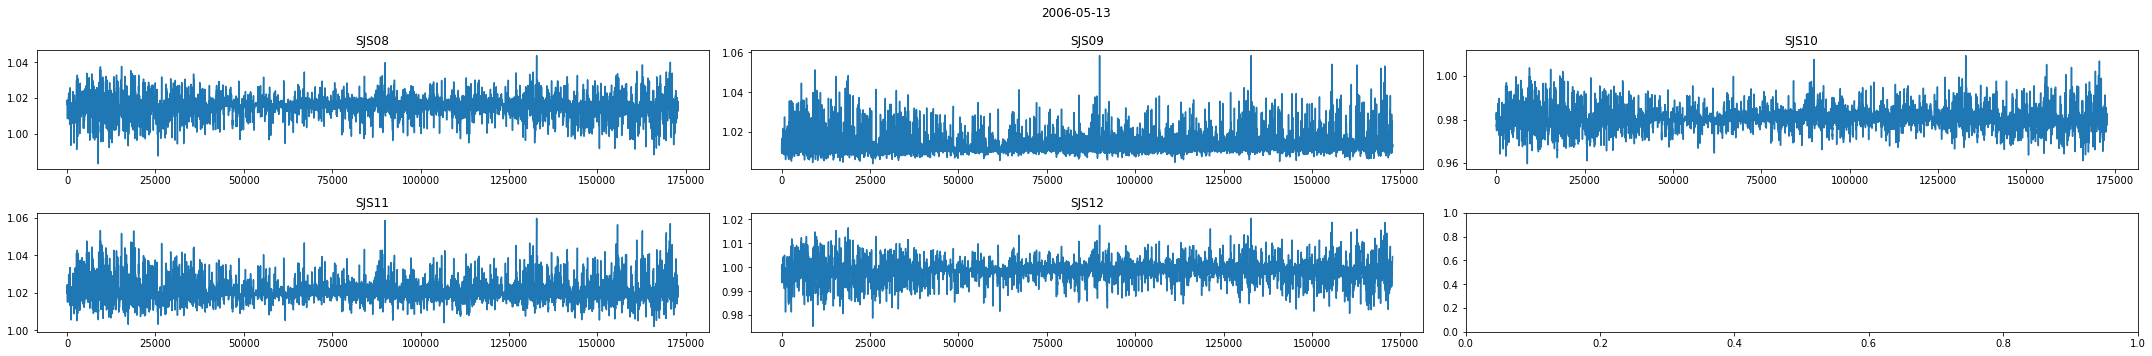

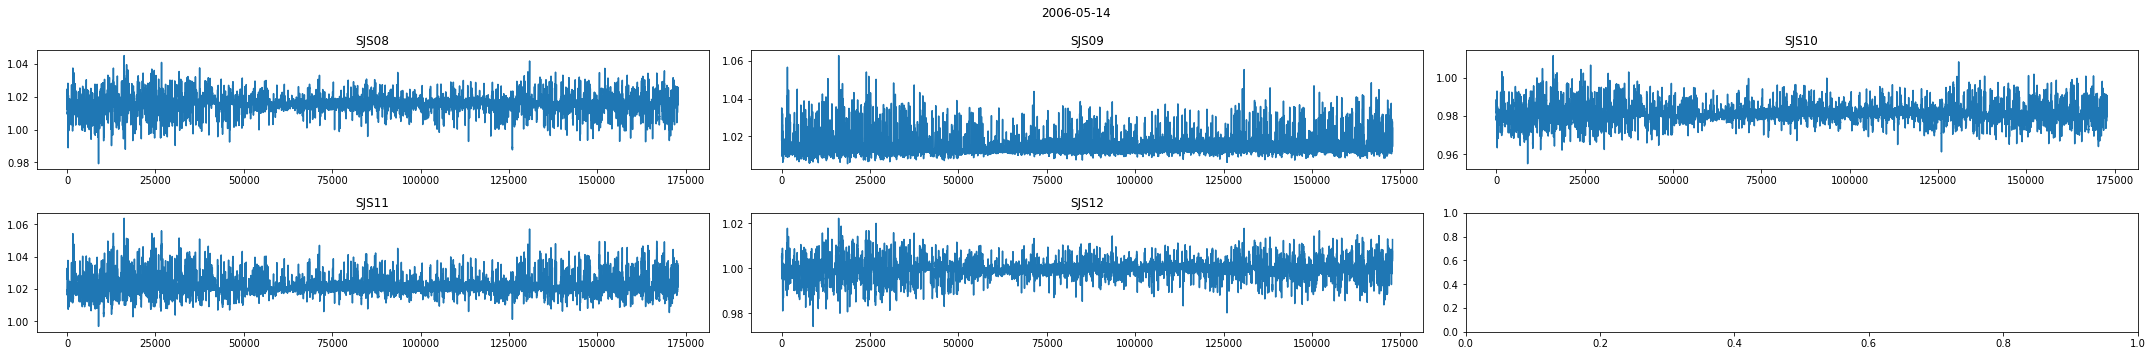

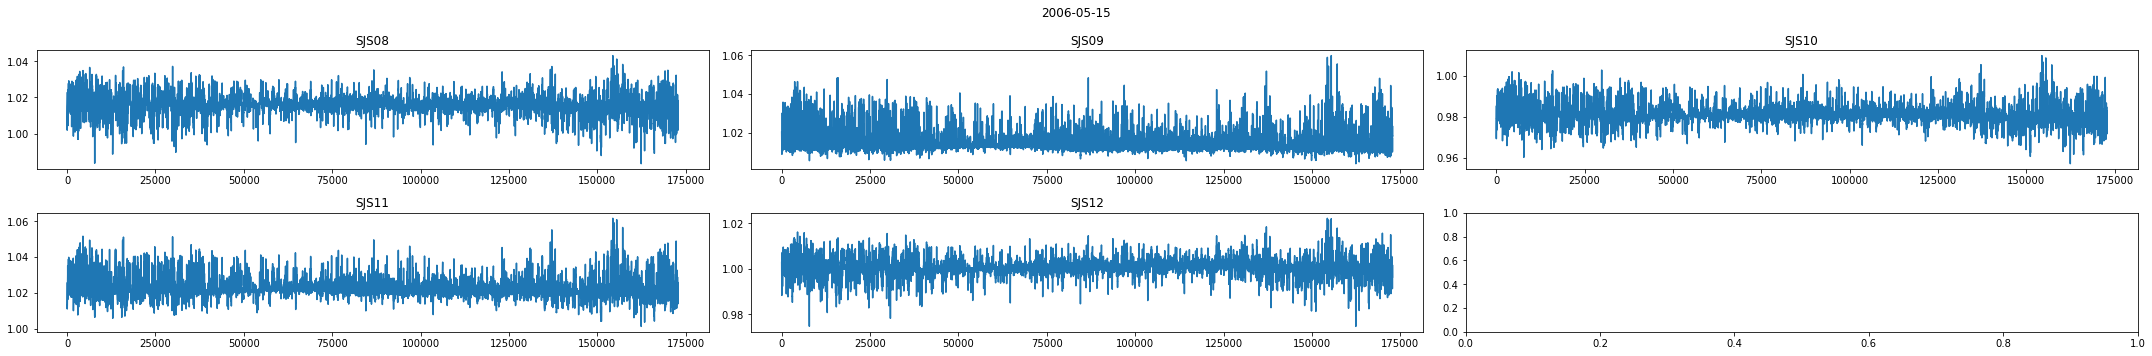

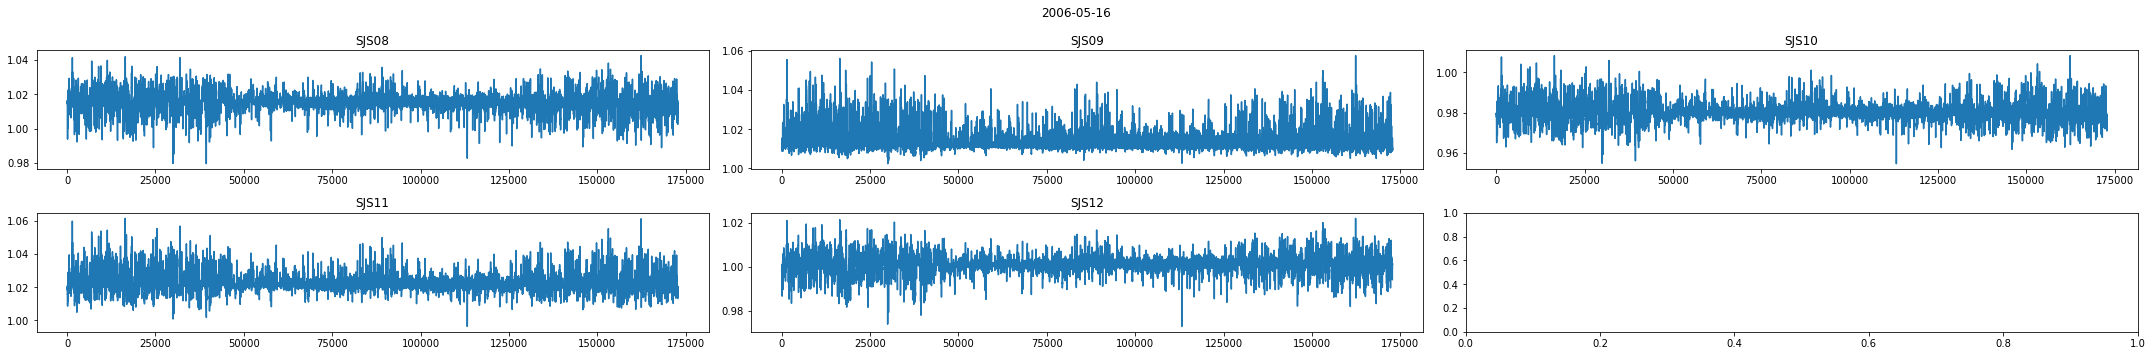

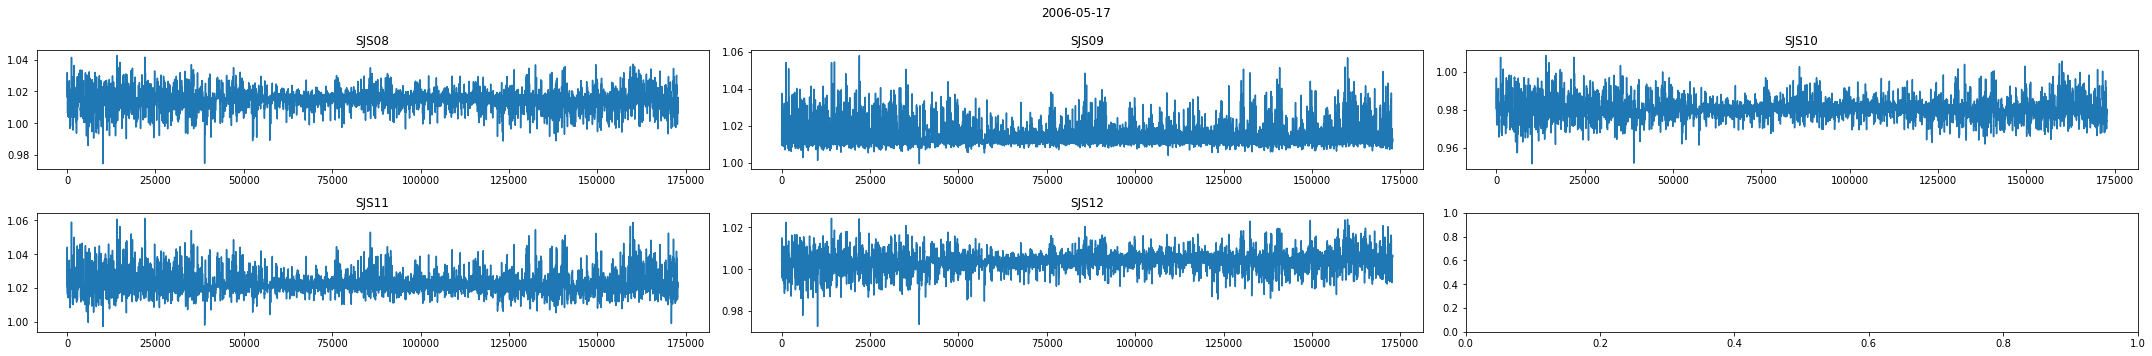

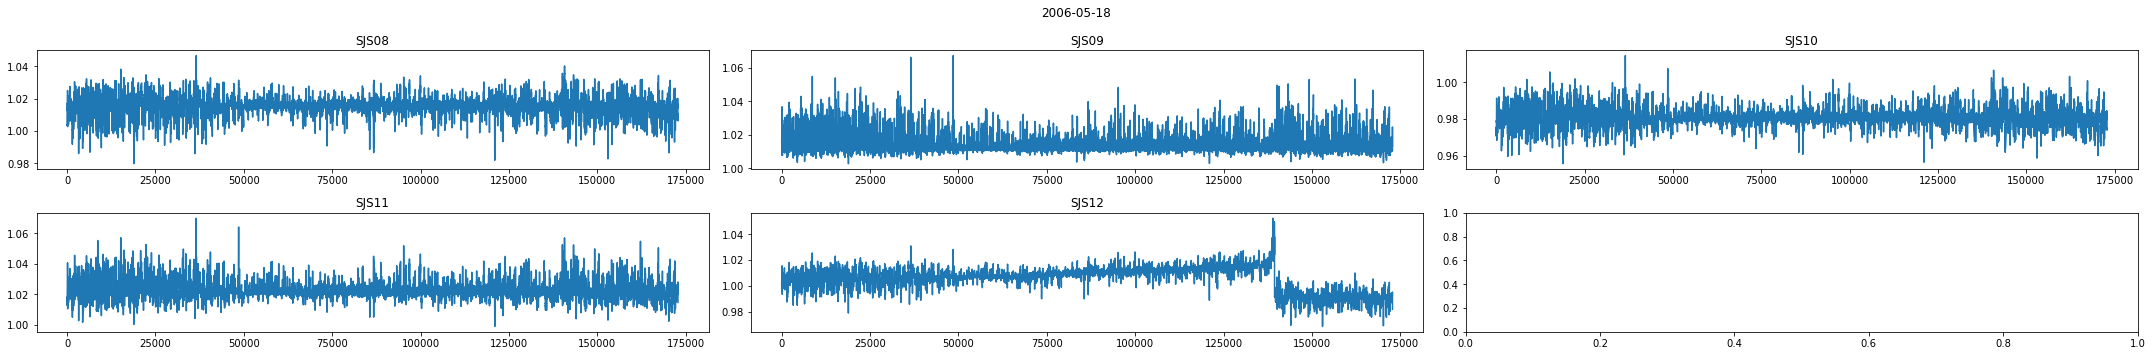

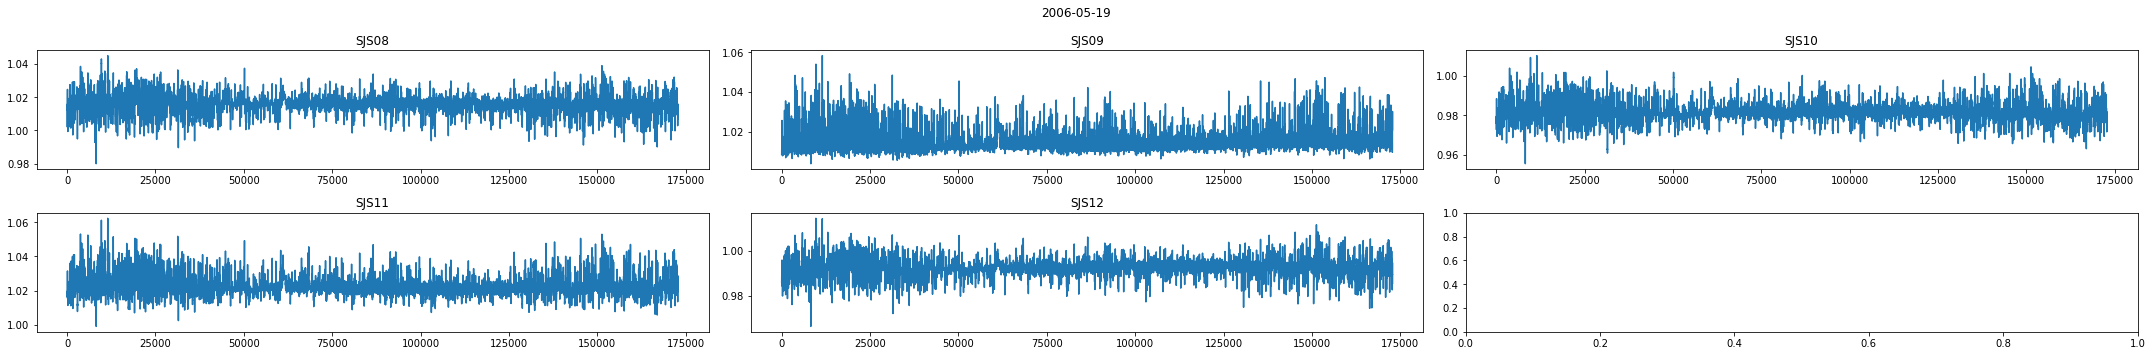

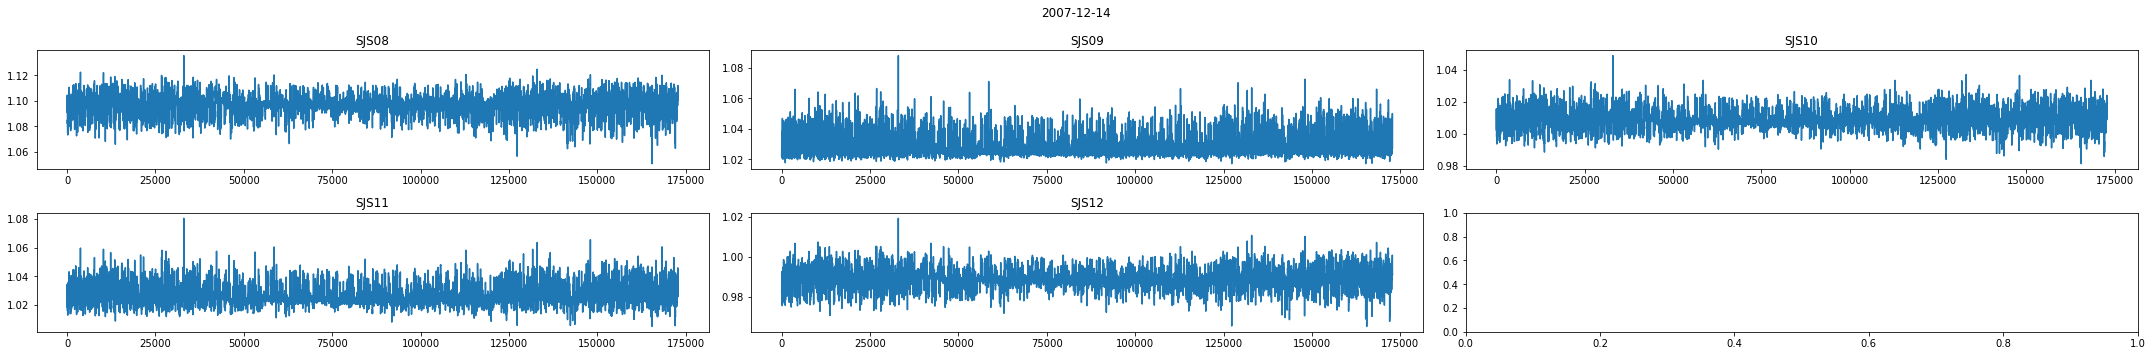

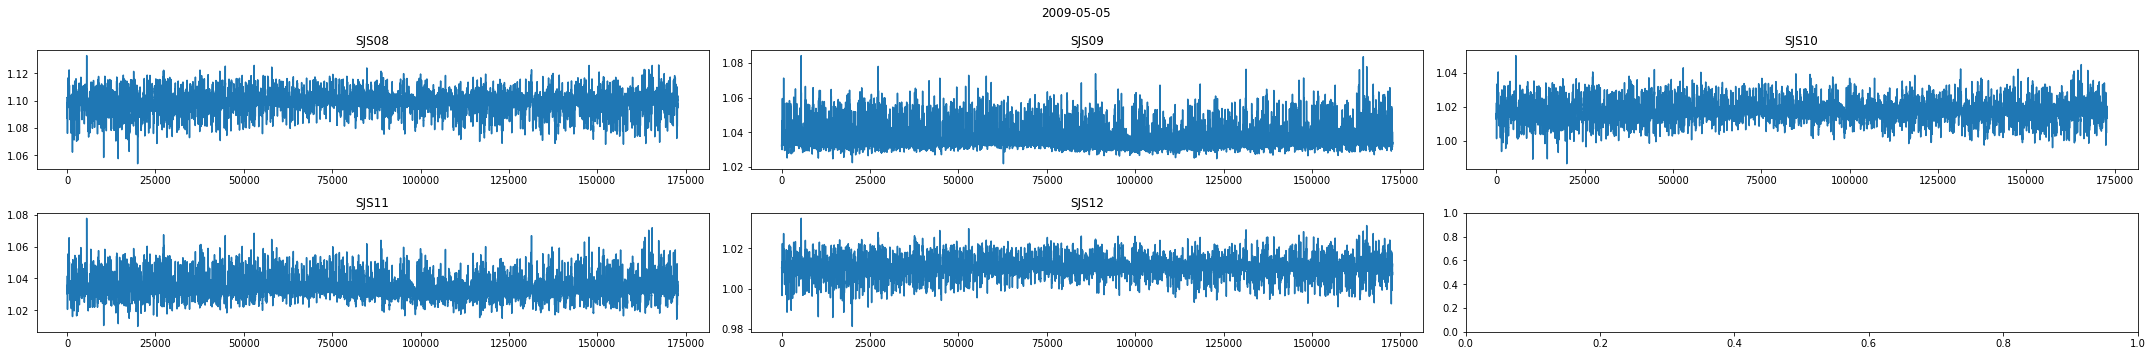

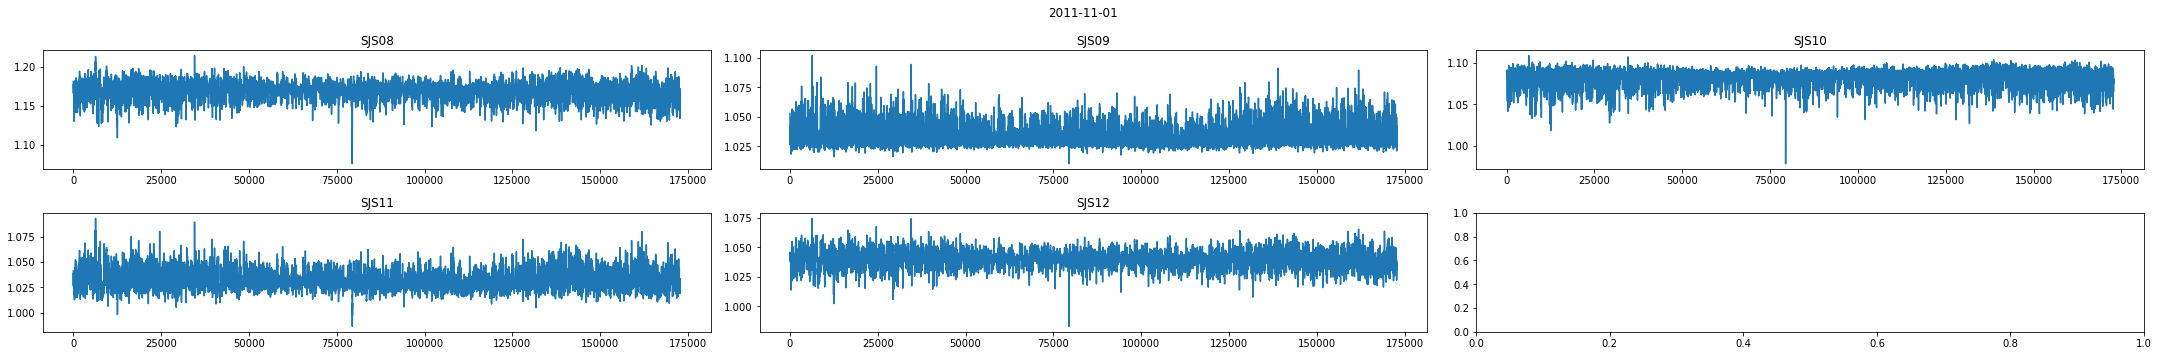

In [16]:
divide_list = []
for i in range(10):
    divide_list.append([])
    fig, ax = plt.subplots(2,3,figsize=(30,5))
    num = 0
    
    for j in range(2):
        for k in range(3):
            if num >= 5:
                break
            idx = num
            num += 1
            
            divide = divide_cable[i][idx]/divide_cable[i][idx+5]
            divide_list[i].append(divide)
            
            ax[j][k].set_title(cable_title[idx])
            ax[j][k].plot(divide)
    plt.suptitle(file_names[i])
    plt.tight_layout()
    plt.show()

In [17]:
divide_list = np.array(divide_list)
divide_list.shape

(10, 5, 172800)

In [21]:
term = cable_diff_rolling.shape[2] // 24
term

7192

In [22]:
split_cable_diff_rolling = []
for i in range(10):
    split_cable_diff_rolling.append([])
    for j in range(12):
        split_cable_diff_rolling[i].append([])
        for k in range(24):
            t = cable_diff_rolling[i][j][term*k:term*(k+1)]
            split_cable_diff_rolling[i][j].append(t)
split_cable_diff_rolling = np.array(split_cable_diff_rolling)
split_cable_diff_rolling.shape

(10, 12, 24, 7192)

In [23]:
term = divide_list.shape[2] // 24
term

7200

In [24]:
split_divide_list = []
for i in range(10):
    split_divide_list.append([])
    for j in range(5):
        split_divide_list[i].append([])
        for k in range(24):
            t = divide_list[i][j][term*k:term*(k+1)]
            split_divide_list[i][j].append(t)
split_divide_list = np.array(split_divide_list)
split_divide_list.shape

(10, 5, 24, 7200)

In [25]:
term = cable_data.shape[2] // 24
term

7192

In [26]:
split_cable_data = []
for i in range(10):
    split_cable_data.append([])
    for j in range(12):
        split_cable_data[i].append([])
        for k in range(24):
            t = cable_data[i][j][term*k:term*(k+1)]
            split_cable_data[i][j].append(t)
split_cable_data = np.array(split_cable_data)
split_cable_data.shape

(10, 12, 24, 7192)

In [30]:
cable_trains = split_cable_diff_rolling.reshape(-1,24,split_cable_diff_rolling.shape[3])
cable_trains.shape

(120, 24, 7192)

In [31]:
divide_trains = split_divide_list.reshape(-1, 24, split_divide_list.shape[3])
divide_trains.shape

(50, 24, 7200)

In [32]:
cable_data_trains = split_cable_data.reshape(-1, 24, split_cable_data.shape[3])
cable_data_trains.shape

(120, 24, 7192)

In [28]:
!pip install fuzzy-c-means

In [29]:
from fcmeans import FCM

In [38]:
for i in range(24):
    cable_train = cable_trains[:,i]
    pre_cable_train = divide_trains[:,i]
    cable_data_train = cable_data_trains[:,i]
    
    print(i)
    print('Diff')
    for k in range(2, 3):
        fcm = FCM(n_clusters = k)
        fcm = fcm.fit(pre_cable_train)
        y_pred = fcm.predict(pre_cable_train)
        y_pred = y_pred.reshape(10,5)
        print('K: ', k)
        print(y_pred)
        print('')
        
    print('\nDetrend')
    for k in range(2, 3):
        fcm = FCM(n_clusters = k)
        fcm = fcm.fit(cable_train)
        y_pred = fcm.predict(cable_train)
        y_pred = y_pred.reshape(10, 12)
        print('K: ', k)
        print(y_pred)
        print('')
    
    print('\nOrigin')
    for k in range(3, 4):
        fcm = FCM(n_clusters = k)
        fcm = fcm.fit(cable_data_train)
        y_pred = fcm.predict(cable_data_train)
        y_pred = y_pred.reshape(10, 12)
        print('K: ', k)
        print(y_pred)
        print('')
        
    print('\n\n')

0
Diff
K:  2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 0 0]]


Detrend
K:  2
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 0 0 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


Origin
K:  3
[[0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 0 2 1 1 0 2 0 2 1]]




1
Diff
K:  2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 0 0]]


Detrend
K:  2
[[0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0

K:  3
[[0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 0 2 1 1 0 2 0 2 1]]




12
Diff
K:  2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 0 0]]


Detrend
K:  2
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


Origin
K:  3
[[0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 0 2 1 1 0 2 0 2 1]]



K:  3
[[0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 2 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 2 2 1 1 0 2 2 2 1]
 [0 2 2 0 2 1 1 0 2 0 2 1]]






In [18]:
from sklearn.cluster import DBSCAN

In [19]:
cable_train = cable_diff_rolling.reshape(-1,cable_diff_rolling.shape[2])
cable_train.shape

(120, 172620)

In [20]:
divide_train = divide_list.reshape(-1, divide_list.shape[2])
divide_train.shape

(50, 172800)

In [21]:
!pip install fuzzy-c-means

In [22]:
from fcmeans import FCM

In [23]:
clustering = DBSCAN(eps=100, min_samples=2).fit_predict(cable_train)

In [24]:
clustering

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1], dtype=int64)

In [25]:
fcm = FCM(n_clusters=2)
fcm.fit(divide_train)

In [26]:
y_pred = fcm.predict(divide_train)
y_pred = y_pred.reshape(10, 5)
y_pred

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0]], dtype=int64)

In [ ]:
#SJ09, SJ11

In [27]:
fcm = FCM(n_clusters=2)
fcm.fit(cable_train)

In [28]:
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
#none

In [29]:
fcm = FCM(n_clusters=5)
fcm.fit(cable_train)

In [30]:
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
#none

In [31]:
cable_train = cable_data.reshape(-1,cable_data.shape[2])
cable_train.shape

(120, 172620)

In [32]:
fcm = FCM(n_clusters=2)
fcm.fit(cable_train)
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [ ]:
#none

In [33]:
fcm = FCM(n_clusters=5)
fcm.fit(cable_train)
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 4, 3, 1, 3, 0],
       [2, 4, 3, 4, 1, 0, 0, 2, 4, 4, 3, 0],
       [2, 4, 3, 3, 1, 0, 0, 2, 4, 4, 3, 0],
       [2, 3, 3, 2, 1, 0, 0, 2, 4, 2, 3, 0]], dtype=int64)

In [ ]:
#SJS09, SJS11, SJX09, SJX10, SJX11

In [34]:
fcm = FCM(n_clusters=6)
fcm.fit(cable_train)
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 0, 3, 5, 3, 2],
       [1, 0, 3, 0, 5, 4, 2, 1, 0, 0, 3, 2],
       [1, 0, 3, 3, 5, 4, 2, 1, 0, 0, 3, 2],
       [1, 3, 3, 1, 5, 4, 2, 1, 0, 1, 3, 4]], dtype=int64)

In [35]:
fcm = FCM(n_clusters=7)
fcm.fit(cable_train)
y_pred = fcm.predict(cable_train)
y_pred = y_pred.reshape(10, 12)
y_pred

array([[3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 1, 4, 4, 5, 0, 2, 6, 4, 5, 4, 2],
       [3, 6, 4, 1, 5, 0, 2, 3, 6, 1, 4, 2],
       [3, 6, 4, 1, 5, 0, 2, 3, 1, 1, 4, 2],
       [3, 4, 4, 3, 5, 0, 2, 3, 6, 3, 4, 0]], dtype=int64)

In [59]:
cable_train_1 = cable_diff_rolling[-1]
cable_train_1.shape

(12, 172620)

In [62]:
fcm = FCM(n_clusters=5)
fcm.fit(cable_train_1)
y_pred = fcm.predict(cable_train_1)
y_pred

array([1, 1, 2, 3, 4, 4, 4, 1, 3, 0, 0, 0], dtype=int64)